<a href="https://colab.research.google.com/github/jeevanshrestha/Machine-Learning/blob/main/Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X.shape

(442, 10)

In [4]:
y.shape

(442,)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import random

class MBGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=10):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []
        self.batch_size = batch_size

    def fit(self, X, y):
        y = y.reshape(-1)  # Ensure y is 1D
        n_samples, n_features = X.shape

        # Initialize coefficients and intercept
        self.coef_ = np.ones(n_features)
        self.intercept_ = 0

        for epoch in range(self.epochs):
            total_loss = 0

            for j in range(int(n_samples / self.batch_size)):
                # Random index selection
                lr = self.learning_rate  #(epoch * n_samples + j) * 0.1
                index = random.sample(range(n_samples), self.batch_size)

                x_sample = X[index]
                y_sample = y[index]

                # Predict the output for this sample
                y_pred = np.dot(x_sample, self.coef_) + self.intercept_

                # Compute gradients
                dw = -(1 / self.batch_size) * np.dot((y_sample - y_pred), x_sample)  # Gradient w.r.t weights
                db = -(1 / self.batch_size) * np.sum(y_sample - y_pred)  # Gradient w.r.t bias

                # Update weights and bias
                self.coef_ -= lr * dw
                self.intercept_ -= lr * db

                # Accumulate the loss for this sample
                total_loss += np.sum((y_sample - y_pred) ** 2)

            # Average loss for the epoch
            epoch_loss = total_loss / n_samples
            self.loss_history.append(epoch_loss)

            if epoch % 10 == 0:  # Print every 10 epochs
                print(f"Epoch {epoch}/{self.epochs}, Loss: {epoch_loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def get_params(self):
        return self.coef_, self.intercept_

    def get_loss_history(self):
        return self.loss_history

    def learning_rate(self, t):
        t0, t1 = 5, 50
        return t0 / (t + t1)

    def plot_loss(self):
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss during Training')
        plt.show()


In [111]:
model = MBGDRegressor(learning_rate=0.01, epochs= 3000, batch_size =10)

In [112]:
model.fit(X_train, y_train)

Epoch 0/3000, Loss: 21568.6613
Epoch 10/3000, Loss: 6306.3602
Epoch 20/3000, Loss: 5840.3428
Epoch 30/3000, Loss: 6091.4645
Epoch 40/3000, Loss: 5783.6592
Epoch 50/3000, Loss: 5639.1275
Epoch 60/3000, Loss: 5510.1707
Epoch 70/3000, Loss: 5220.3169
Epoch 80/3000, Loss: 4720.7089
Epoch 90/3000, Loss: 5047.5829
Epoch 100/3000, Loss: 4419.4652
Epoch 110/3000, Loss: 5111.4607
Epoch 120/3000, Loss: 4837.6358
Epoch 130/3000, Loss: 4545.7352
Epoch 140/3000, Loss: 3983.4476
Epoch 150/3000, Loss: 5069.2548
Epoch 160/3000, Loss: 4529.3080
Epoch 170/3000, Loss: 4205.3069
Epoch 180/3000, Loss: 4571.6927
Epoch 190/3000, Loss: 4720.7821
Epoch 200/3000, Loss: 4195.1572
Epoch 210/3000, Loss: 3986.4294
Epoch 220/3000, Loss: 3998.2374
Epoch 230/3000, Loss: 4237.2735
Epoch 240/3000, Loss: 3983.3638
Epoch 250/3000, Loss: 3731.3070
Epoch 260/3000, Loss: 3437.5197
Epoch 270/3000, Loss: 3953.4003
Epoch 280/3000, Loss: 4034.7620
Epoch 290/3000, Loss: 3856.7910
Epoch 300/3000, Loss: 3867.7434
Epoch 310/3000, Lo

In [113]:
y_pred = model.predict(X_test)

In [114]:
r2_score(y_test, y_pred)

0.45319057854658784

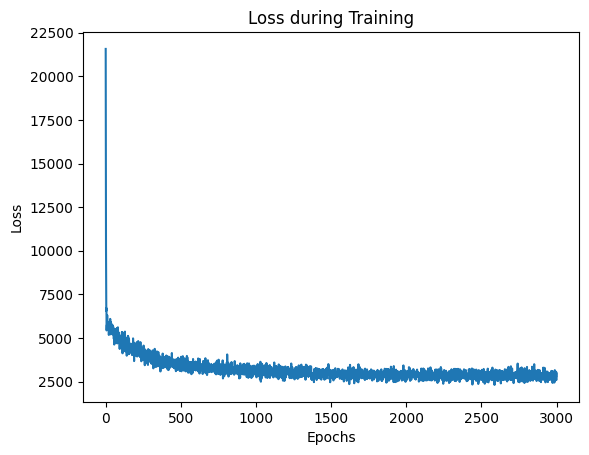

In [115]:
model.plot_loss()

In [116]:
model.get_params()

(array([  10.39060628, -176.55255293,  495.78730748,  326.63598016,
         -40.92139834, -117.94594222, -194.42321446,  102.58400353,
         456.58160992,   94.55282368]),
 151.96250396192954)